In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc
import cmath

In [ ]:
def matrix(n,diag,upper,lower):
  k=len(diag)
  dia=[]
  for i in range(n):
    for j in range(k):
      dia.append(diag[j])

  #UPPER
  up=[]
  for i in range(n):
    for j in range(k):
      up.append(upper[j])

  up=up[:-1]
  A=np.diag(dia)


  for i in range(int(n*k)-1):
    A[i][i+1]=up[i]
    A[i+1][i]=up[i]

  #N=int(n*k)
  #A[0][0]=A[0][0]+pert[0]
  #A[N-1][N-1]=A[N-1][N-1]+pert[1]

  return(A)

In [ ]:
def matrix_fixed_bc(n,diag,upper,lower,pert):
  k=len(diag)
  dia=[]
  for i in range(n):
    for j in range(k):
      dia.append(diag[j])

  #UPPER
  up=[]
  for i in range(n):
    for j in range(k):
      up.append(upper[j])

  up=up[:-1]
  A=np.diag(dia)


  for i in range(int(n*k)-1):
    A[i][i+1]=up[i]
    A[i+1][i]=up[i]

  N=int(n*k)
  A[0][0]=A[0][0]+pert[0]
  A[N-1][N-1]=A[N-1][N-1]+pert[1]

  return(A)

In [ ]:
def pert(n,k):
  u=np.random.rand(int(n*k))#vec[0]#[0.1,0,100]
  for i in range(1,int(n*k)-1):
    u[i]=0
  v=u#[0.1,0,100]
  u,v=np.array(u)/(np.linalg.norm(u)),np.array(v)/(np.linalg.norm(v))
  v=v.T

  v=v.reshape(1,int(n*k))
  u=u.reshape(int(n*k),1)

  c=(u @ v)

  return(c,u)

#c=(u @ v.T)

In [ ]:
def qgamma(diag_k,u_k,l_k,k):    #to find gamma  and  Qk(z)
  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)
  return(q,gamma1)

In [ ]:
def chebeig(diag_k,u_k,l_k,k,t):      
  n=int(k*t)
  q,g=qgamma(diag_k,u_k,l_k,k)
  #print(diag_k)
  q=np.array(q,dtype="complex")
  #print(q,g)
  tnroots=np.zeros(int(n/k),dtype=complex)
  for l in range(1,int(n/k)+1):
    tnroots[l-1]=1j*2*np.cos(np.pi/((n/k)+1)*(l))
  #print(tnroots)
  zcheb = []  #upto this fine
  c0=q[k]
  for i in range(int(n/k)):
    q[k]=c0+((cmath.sqrt(g))*tnroots[i])
    
    zcheb=np.concatenate((zcheb,-np.roots(q)))  
  #print(g)
  #print(np.shape(zcheb))
  return(zcheb)

In [ ]:
def thomas(A,d):    
    m,n=np.shape(A)
    a=np.diag(A,-1)
    b=np.diag(A)
    c=np.diag(A,1)
    
    a=np.array(a,dtype='complex')
    b=np.array(b,dtype='complex')
    c=np.array(c,dtype='complex')
    d=np.array(d,dtype='complex')
    x=np.zeros(m,dtype="complex")
    
    #forward propogation
    for i in range(m-1):
        w=a[i]/b[i]
        b[i+1]=b[i+1]-(w*c[i])
        d[i+1]=d[i+1]-(w*d[i])
        
    #back substitution
    
    x[m-1]=d[m-1]/b[m-1]
    
    for i in range(m-2,-1,-1):
        x[i]=(d[i]-(c[i]*x[i+1]))/b[i]
        
    return(x)

In [ ]:
7./3-4./3-1

2.220446049250313e-16

In [ ]:
def inv_itr(A,muo):
    e_m=7./3-4./3-1  #machine epsion
    m,n=np.shape(A)
    x=np.ones(m)#np.random.rand(m)
    #print(x)
    B=(A-muo*np.identity(m))
    #check diagonal elements of B are zero or not.If it is zero, add some perturbation.
    
    for i in range(m):
        if((B[i][i])==0):
            B[i][i]=B[i][i]+(e_m*10)

    for  i in range(10):
        v=thomas(B,x)
        if((np.linalg.norm(v))==0):
            v=np.array(v)#/(np.linalg.norm(v))  #x is the eigen vector.
        else:
            v=np.array(v)/(np.linalg.norm(v))
            
    muo=np.transpose(v)@A@v   #muo is the eigen value
    return(muo,v)  

In [ ]:
def qgamma_n(diag_k,u_k,l_k,k):    #to find gamma  and  Qk(z)
  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)
  return(P1,P2,P3,P4)

In [ ]:
k=3
diag=[0,0,0] 
upper=[0,0,1] #np.random.rand(k) #[5,4,1]#-
lower=upper
upper,lower,diag=np.array(upper),np.array(lower),np.array(diag)

a) do with diag=[0,0,0] 
upper=[1,0,0]
lower=u
pert=[100,0],[1,0],wont work when pert between (1,-1)

b)d=[1,2,3],l=[1,4,-2]=u

c)diag=[10,12,3] 
upper=[1,41,5],l=u

d)diag=[10,12,-3,1,5] 
upper=[11,41,5,-1,10],l=u

e)diag=[19,12,-3,1,500] 
upper=[11,41,5,-1,10],l=u

f)diag=[0,0,0] 
upper=[1,1,1]

Direct replacement

In [ ]:
#for small n
n=2
k=len(diag)
pert=[10,0]
A=matrix(n,diag,upper,lower)
val_cheb=chebeig(diag,upper,lower,k,n)
val_cheb.sort()
val_built,vec_built=np.linalg.eig(A)
val_built.sort()

A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
val_built_fixed.sort()

In [ ]:
z=abs(val_cheb-val_built_fixed)

#index which has the highest replacement
ind_0=(np.where(z==max(z))[0])[0]
z[ind_0]=0

#index which has the second highest replacement
ind_1=(np.where(z==max(z))[0])[0]

val_cheb_1=val_cheb[ind_0]

val_cheb_2=val_cheb[ind_1]

val_b_1=val_built_fixed[ind_0]

val_b_2=val_built_fixed[ind_1]

In [ ]:
inv_itr(A_fixed_bc,val_b_1)[0]

(2.4651903288156566e-30+0j)

In [ ]:
N=[10,20,30,40,50,60,70,80,90,100]
E_b=[]
E_a=[]

for n in N:
  #perform direct replacement for large n


  A=matrix(n,diag,upper,lower)
  val_cheb=chebeig(diag,upper,lower,k,n)
  val_cheb.sort()
  val_built,vec_built=np.linalg.eig(A)
  val_built.sort()

  A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
  val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
  val_built_fixed.sort()

  #error before direct replacement
  avg_abs_e_b=sum(abs(val_cheb-val_built_fixed))
  avg_abs_e_b=avg_abs_e_b/(n*k)
  E_b.append(avg_abs_e_b)


  #direct replacement
  z_0=abs(val_cheb-val_cheb_1)
  ind_rep_0=(np.where(z_0==min(z_0))[0])[0]

  z_1=abs(val_cheb-val_cheb_2)
  ind_rep_1=(np.where(z_1==min(z_1))[0])[0]

  val_cheb[ind_rep_0]=val_b_1
  val_cheb[ind_rep_1]=val_b_2
  val_cheb.sort()

  #error after direct replacement
  avg_abs_e_a=sum(abs(val_cheb-val_built_fixed))
  avg_abs_e_a=avg_abs_e_a/(n*k)
  E_a.append(avg_abs_e_a)

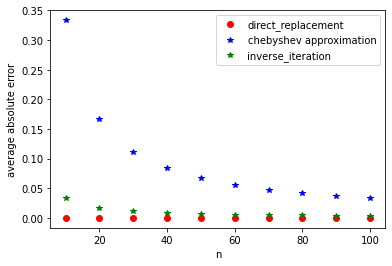

In [ ]:
#graphs
plt.plot(N,E_a,"o",color="red",label="direct_replacement")
plt.plot(N,E_b,"*",color="blue",label="chebyshev approximation")
plt.plot(N,E_i,"*",color="green",label="inverse_iteration")
plt.xlabel("n")
plt.ylabel("average absolute error")
plt.legend()

plt.savefig("inv_itr_d=[0,0,0],l=[0,0,1],u=l,pert=10.png")

Replacement with inverse iteration

In [ ]:
N=[10,20,30,40,50,60,70,80,90,100]
E_i=[]
for n in N:
  #perform direct replacement for large n
  A=matrix(n,diag,upper,lower)
  val_cheb=chebeig(diag,upper,lower,k,n)
  val_cheb.sort()
  val_built,vec_built=np.linalg.eig(A)
  val_built.sort()

  A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
  val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
  val_built_fixed.sort()

  #inverse iteration
  z_0=abs(val_cheb-val_cheb_1)
  ind_rep_0=(np.where(z_0==min(z_0))[0])[0]

  z_1=abs(val_cheb-val_cheb_2)
  ind_rep_1=(np.where(z_1==min(z_1))[0])[0]

  val_cheb[ind_rep_0]=inv_itr(A_fixed_bc,val_b_1)[0]
  #val_cheb[ind_rep_1]=inv_itr(A_fixed_bc,val_b_2)[0]
  val_cheb.sort()

  #error after direct replacement
  avg_abs_e_i=sum(abs(val_cheb-val_built_fixed))
  avg_abs_e_i=avg_abs_e_i/(n*k)
  E_i.append(avg_abs_e_i)